In [1]:
import pandas as pd
import matplotlib.pyplot as plt
infile="/Users/irffanalahi/Research/Research_code/gitignorefolder/DMRrelated/diagnosis/genomic_feature_allwithheader/PBLtilMel_meldiff-.7_other-.1_q0.00001_sorted4_1_genomic_feature_bilge_celltypeseperated/MEL_TUMOR/promdataready_all_matrixCin_nr0.5_imputed_g1_MEL_TUMOR_3_g2_others_15.txt_q0.01_diff0.7_hypo.txt_intron_genecode_v36_modified.txt_canonical.txt_proteinCodingGene.txt_method1.txt.txt"

outfile=infile+".pdf"

indf=pd.read_csv(infile,sep="\t")

diffcol='Mel_Tumor-others'


diffrange=[-.1,-.3,-.5,-.7,-0.8,-0.85,-.9]


indf.head()

,chrom,start,end,q,Mel_Tumor-others,#cpg,p(MWU),p(2dks),Mel_Tumor,Others,...,hg38.knownCanonical.chromStart_x,hg38.knownCanonical.chromEnd_x,hg38.knownCanonical.transcript,transcriptno_old,direction,#hg38.knownCanonical.chrom_y,hg38.knownCanonical.chromStart_y,hg38.knownCanonical.chromEnd_y,hg38.kgXref.geneSymbol,transcriptno
0,chr10,68525812,68526086,3.090000e-14,-0.900649,9,4.640000e-14,2.110000e-16,0.019444,0.92009,...,68516843,68527245,ENST00000609923.6,7,-,chr10,68477997,68527523,SLC25A16,2
1,chr7,92698156,92698739,4.050000e-20,-0.873659,13,4.450000e-14,1.510000e-22,0.032051,0.90571,...,92671535,92725625,ENST00000424848.3,3,-,chr7,92604920,92836573,CDK6,1
2,chr13,41648540,41648756,1.460000e-06,-0.867650,4,5.340000e-08,3.250000e-08,0.038833,0.90648,...,41615084,41670945,ENST00000379310.8,7,-,chr13,41566834,41961109,VWA8,0
3,chr7,37298409,37298573,4.530000e-07,-0.866256,4,5.340000e-08,9.060000e-09,0.027500,0.89376,...,37271882,37314849,ENST00000310758.8,17,-,chr7,36854360,37449249,ELMO1,2
4,chr17,4229676,4230435,4.800000e-11,-0.861158,8,5.360000e-14,4.940000e-13,0.030792,0.89195,...,4217118,4235771,ENST00000341657.9,21,-,chr17,4163820,4263979,ANKFY1,2


In [2]:
set(indf['direction'].tolist())

{'+', '-'}

In [3]:
indfposdirection=indf[indf['direction']=='+']
indfnegdirection=indf[indf['direction']=='-']

In [4]:
#indfposdirection['transcriptno'].plot.kde()

In [5]:
indfposdirection.shape

(516, 27)

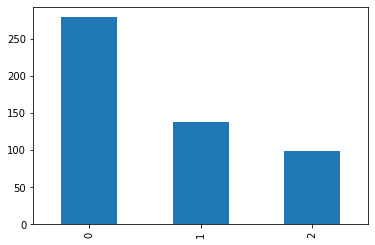

In [6]:
fig, ax = plt.subplots()
indfposdirection['transcriptno'].value_counts().plot(ax=ax, kind='bar')

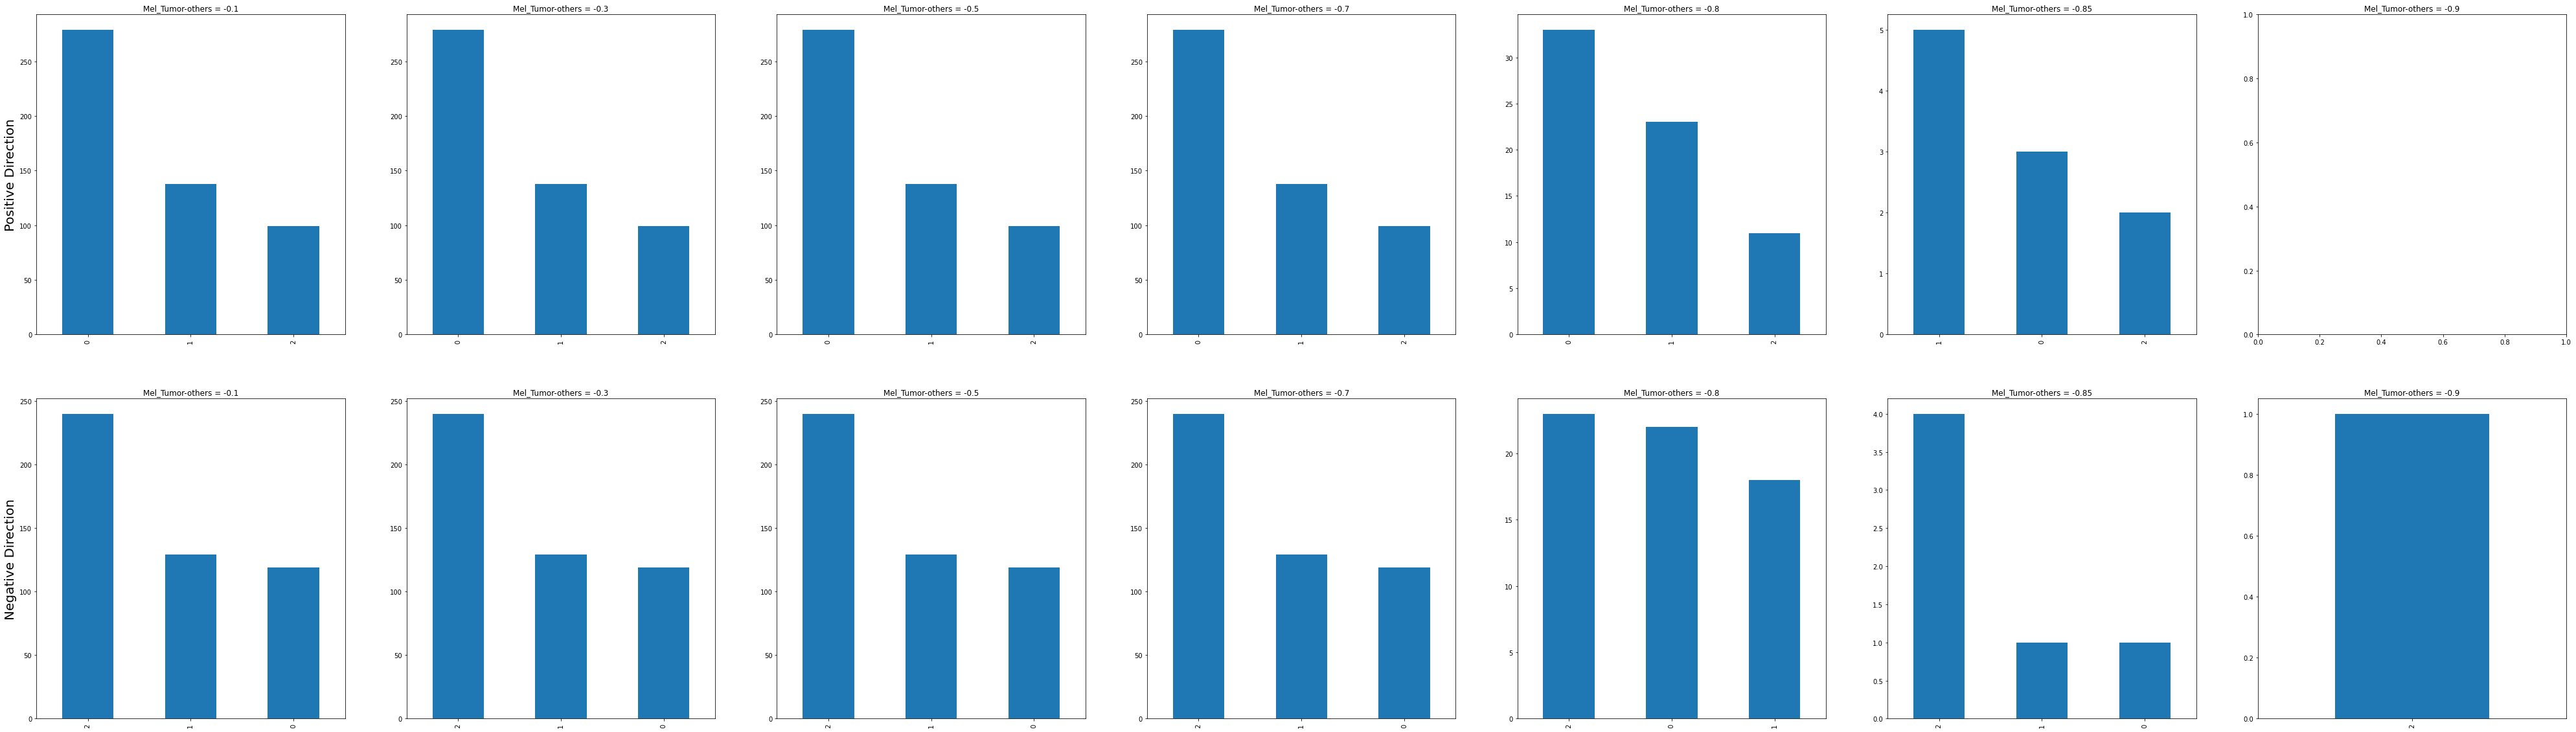

In [7]:
fig, ax = plt.subplots(2, len(diffrange), figsize=(10*len(diffrange), 10*2))

for i in range(len(diffrange)):
    indfposdirection_new = indfposdirection[indfposdirection[diffcol] < diffrange[i]]
    if len(indfposdirection_new) != 0:
        indfposdirection_new['transcriptno'].value_counts().plot(ax=ax[0][i], kind='bar')
    ax[0][i].set_title(diffcol + ' = ' + str(diffrange[i]))
    if i == 0:
        ax[0][i].set_ylabel('Positive Direction', fontsize=20)
    
for i in range(len(diffrange)):
    indfnegdirection_new = indfnegdirection[indfnegdirection[diffcol] < diffrange[i]]
    if len(indfnegdirection_new) != 0:
        indfnegdirection_new['transcriptno'].value_counts().plot(ax=ax[1][i], kind='bar')
    ax[1][i].set_title(diffcol + ' = ' + str(diffrange[i]))
    if i == 0:
        ax[1][i].set_ylabel('Negative Direction', fontsize=20)

In [8]:
fig.savefig(outfile, dpi=300, bbox_inches='tight')